In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\91882\Downloads\archive (1)\Monthly_Food_Retail_Prices.csv")
#for get all data without summary
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
df.isnull().sum()

State                0
Centre               0
Commodity         8939
Variety         188771
Unit                 0
Category             0
Date                 0
Retail Price    524360
dtype: int64

In [4]:
df1= df.isnull().sum()/df.shape[0]*100
df1

State            0.000000
Centre           0.000000
Commodity        0.852490
Variety         18.002623
Unit             0.000000
Category         0.000000
Date             0.000000
Retail Price    50.006914
dtype: float64

<AxesSubplot:>

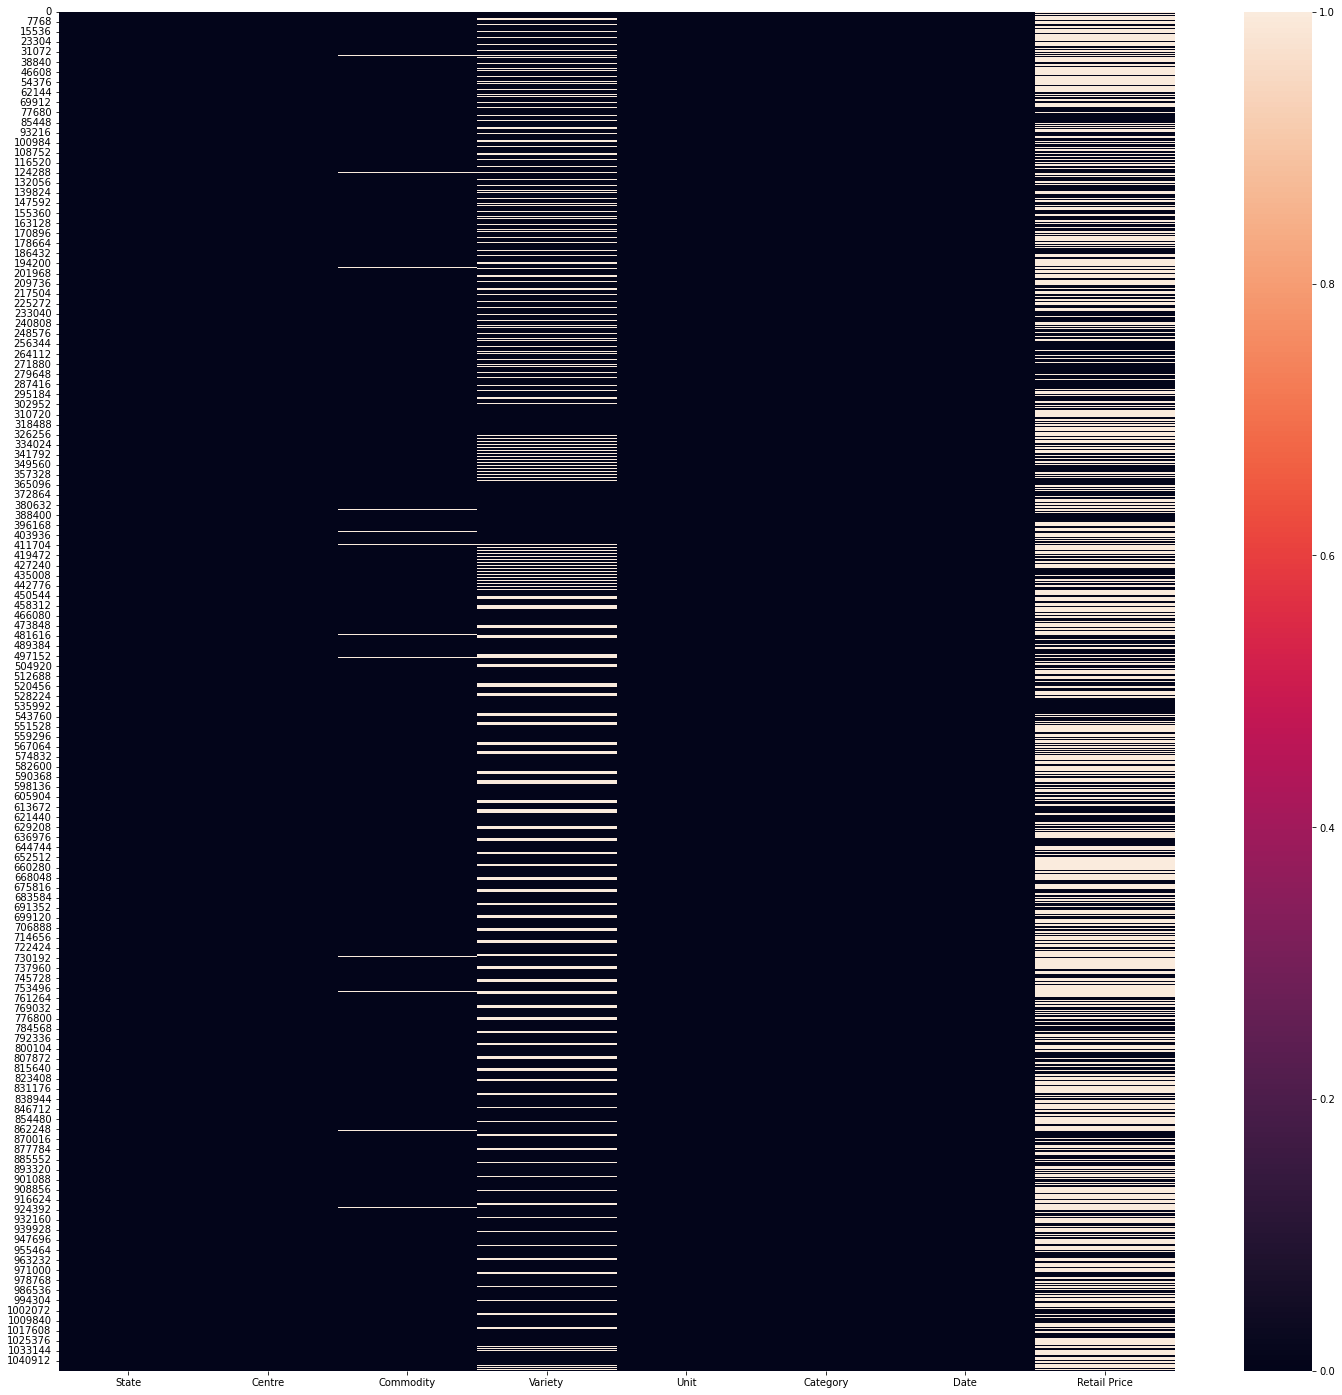

In [5]:
plt.figure(figsize=(25,25))
sns.heatmap(df.isnull())

In [6]:
#drop the same value columns
df = df.drop(['Category'],axis=1)

#get values after drop the duplicates rows
df2=df.drop_duplicates()

#reset index
df2.reset_index(inplace = True)

#we are taking data till 1000 index due to technical issue
#df2_dupli_drop.head(1000)

In [7]:
df1_col=df1[df1>0].keys()
df1_col

Index(['Commodity', 'Variety', 'Retail Price'], dtype='object')

# NOW we will drow the graph between commodity and retail price

In [8]:
# fill the true and false value where nan is or not
df = df.fillna(np.nan)
df.head(10)

,State,Centre,Commodity,Variety,Unit,Date,Retail Price
0,Andhra Pradesh,Chittoor,Moong,Split,Kg.,Jan-2001,24.0
1,Andhra Pradesh,Guntur,Moong,Split,Kg.,Jan-2001,26.0
2,Andhra Pradesh,Kurnool,Moong,Split,Kg.,Jan-2001,25.5
3,Andhra Pradesh,Vishakhapatnam,Moong,Split,Kg.,Jan-2001,NaN
4,Arunachal Pradesh,Itanagar,Moong,Split,Kg.,Jan-2001,NaN
5,Assam,Dibrugarh,Moong,Split,Kg.,Jan-2001,NaN
6,Assam,Dispur,Moong,Split,Kg.,Jan-2001,NaN
7,Assam,Guwahati,Moong,Split,Kg.,Jan-2001,NaN
8,Assam,Silchar,Moong,Split,Kg.,Jan-2001,NaN
9,Bihar,Gaya,Moong,Split,Kg.,Jan-2001,NaN


In [9]:
df['delayed'] = df['Retail Price'].apply(lambda x: x > 0)
df['delayed'].head(10)

0     True
1     True
2     True
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: delayed, dtype: bool

In [10]:
delayed_flights = df[df['delayed'] == True]

delayed_flights['Commodity'].value_counts()       #count the number of rows for each carrier

Rice             33278
Gram             22990
Milk             22014
Salt             20633
Tea              18117
Fish             17467
Coconut          16901
Gur              12107
Moong            11982
Potato           11978
Sugar            11975
Arhar            11922
Onion            11905
Coffee           11772
Meat             11559
Eggs             11461
Atta             11454
Red Chillies     11442
Suji             11415
Banana           11407
Brinjal          11400
Maida            11335
Chicken          11265
Black Pepper     11242
Coriander        11112
Ghee             11033
Mustard Oil      10878
Masur            10846
Besan            10780
Biscuit          10703
Bread            10682
Butter           10494
Cummin Seed      10476
Groundnut Oil     9974
Coconut Oil       9802
Apple             9712
Maize             8904
Gingelly Oil      7741
Bajra             7620
Jowar             7239
Ragi              4734
Wheat             2264
Turmeric          1732
Urad       

In [11]:
#for do sep-sep the true and false
delayed_by_carrier=df.groupby(['Commodity','delayed']).size().unstack()
delayed_by_carrier

delayed,False,True
Commodity,,
Apple,10700,9712
Arhar,8490,11922
Atta,8958,11454
Bajra,9147,7620
Banana,9005,11407
Besan,9632,10780
Biscuit,9952,10703
Black Pepper,9170,11242
Bread,9730,10682


In [12]:
#for get the flights_count of amaount of true and false
delayed_by_carrier['flights_count'] = (delayed_by_carrier[False] + delayed_by_carrier[True])
delayed_by_carrier[:5]

delayed,False,True,flights_count
Commodity,,,
Apple,10700,9712,20412
Arhar,8490,11922,20412
Atta,8958,11454,20412
Bajra,9147,7620,16767
Banana,9005,11407,20412


In [13]:
#for get the proportion_delayed of amaount of true and flights_count
delayed_by_carrier['proportion_delayed'] = delayed_by_carrier[True] / delayed_by_carrier['flights_count']
delayed_by_carrier[:5]

delayed,False,True,flights_count,proportion_delayed
Commodity,,,,
Apple,10700,9712,20412,0.475799
Arhar,8490,11922,20412,0.584068
Atta,8958,11454,20412,0.561141
Bajra,9147,7620,16767,0.454464
Banana,9005,11407,20412,0.558838


In [14]:
#it's will give avarage of retail price according to every commodity 
df_pitot =df.pivot_table(columns='Commodity', values='Retail Price')
df_pitot

Commodity,Apple,Arhar,Atta,Bajra,Banana,Besan,Biscuit,Black Pepper,Bread,Brinjal,Butter,Chicken,Coconut,Coconut Oil,Coffee,Coriander,Cummin Seed,Eggs,Fish,Ghee,Gingelly Oil,Gram,Groundnut Oil,Gur,Jowar,Maida,Maize,Masur,Meat,Milk,Moong,Mustard Oil,Onion,Potato,Ragi,Red Chillies,Rice,Salt,Sugar,Suji,Tea,Tomato,Turmeric,Urad,Vanaspati,Wheat
Retail Price,99.264003,66.089116,20.862467,16.380198,29.592159,57.475338,6.2716,410.530472,18.343253,21.3675,31.462188,122.814603,66.601595,147.526903,522.077523,15.941046,185.811712,41.434535,179.507669,317.283105,125.393361,49.875032,100.698838,35.182773,19.683539,22.233828,18.300261,55.684447,293.665484,30.665174,69.010457,88.410144,20.865233,15.350576,23.730376,17.857193,32.885514,9.869888,29.941937,24.454835,129.816898,10.808247,7.398857,29.768846,47.536764,9.831692


In [15]:
#for graph start,stop,distance
bin_values = np.arange(start=0, stop=600, step=50)

In [16]:
# we have all types of commodity
a=['Apple', 'Arhar', 'Atta','Bajra', 'Banana', 'Besan', 'Biscuit', 'Black Pepper','Bread','Brinjal','Butter','Chicken','Coconut','Coconut Oil',
'Coffee','Coriander','Cummin Seed','Eggs','Fish','Ghee','Gingelly Oil','Gram','Groundnut Oil','Gur',             
'Jowar','Maida','Maize','Masur','Meat','Milk', 'Moong','Mustard Oil','Onion','Potato','Ragi','Red Chillies',     
'Rice','Salt','Sugar','Suji','Tea','Tomato','Turmeric','Urad','Vanaspati','Wheat']

C:\Users\91882\AppData\Local\Temp\ipykernel_14816\317582488.py:2: FutureWarning: Passing lists as key for xs is deprecated and will be removed in a future version. Pass key as a tuple instead.
  s = df_pitot.xs(a, axis=1)


Text(0, 0.5, 'Retail Price')

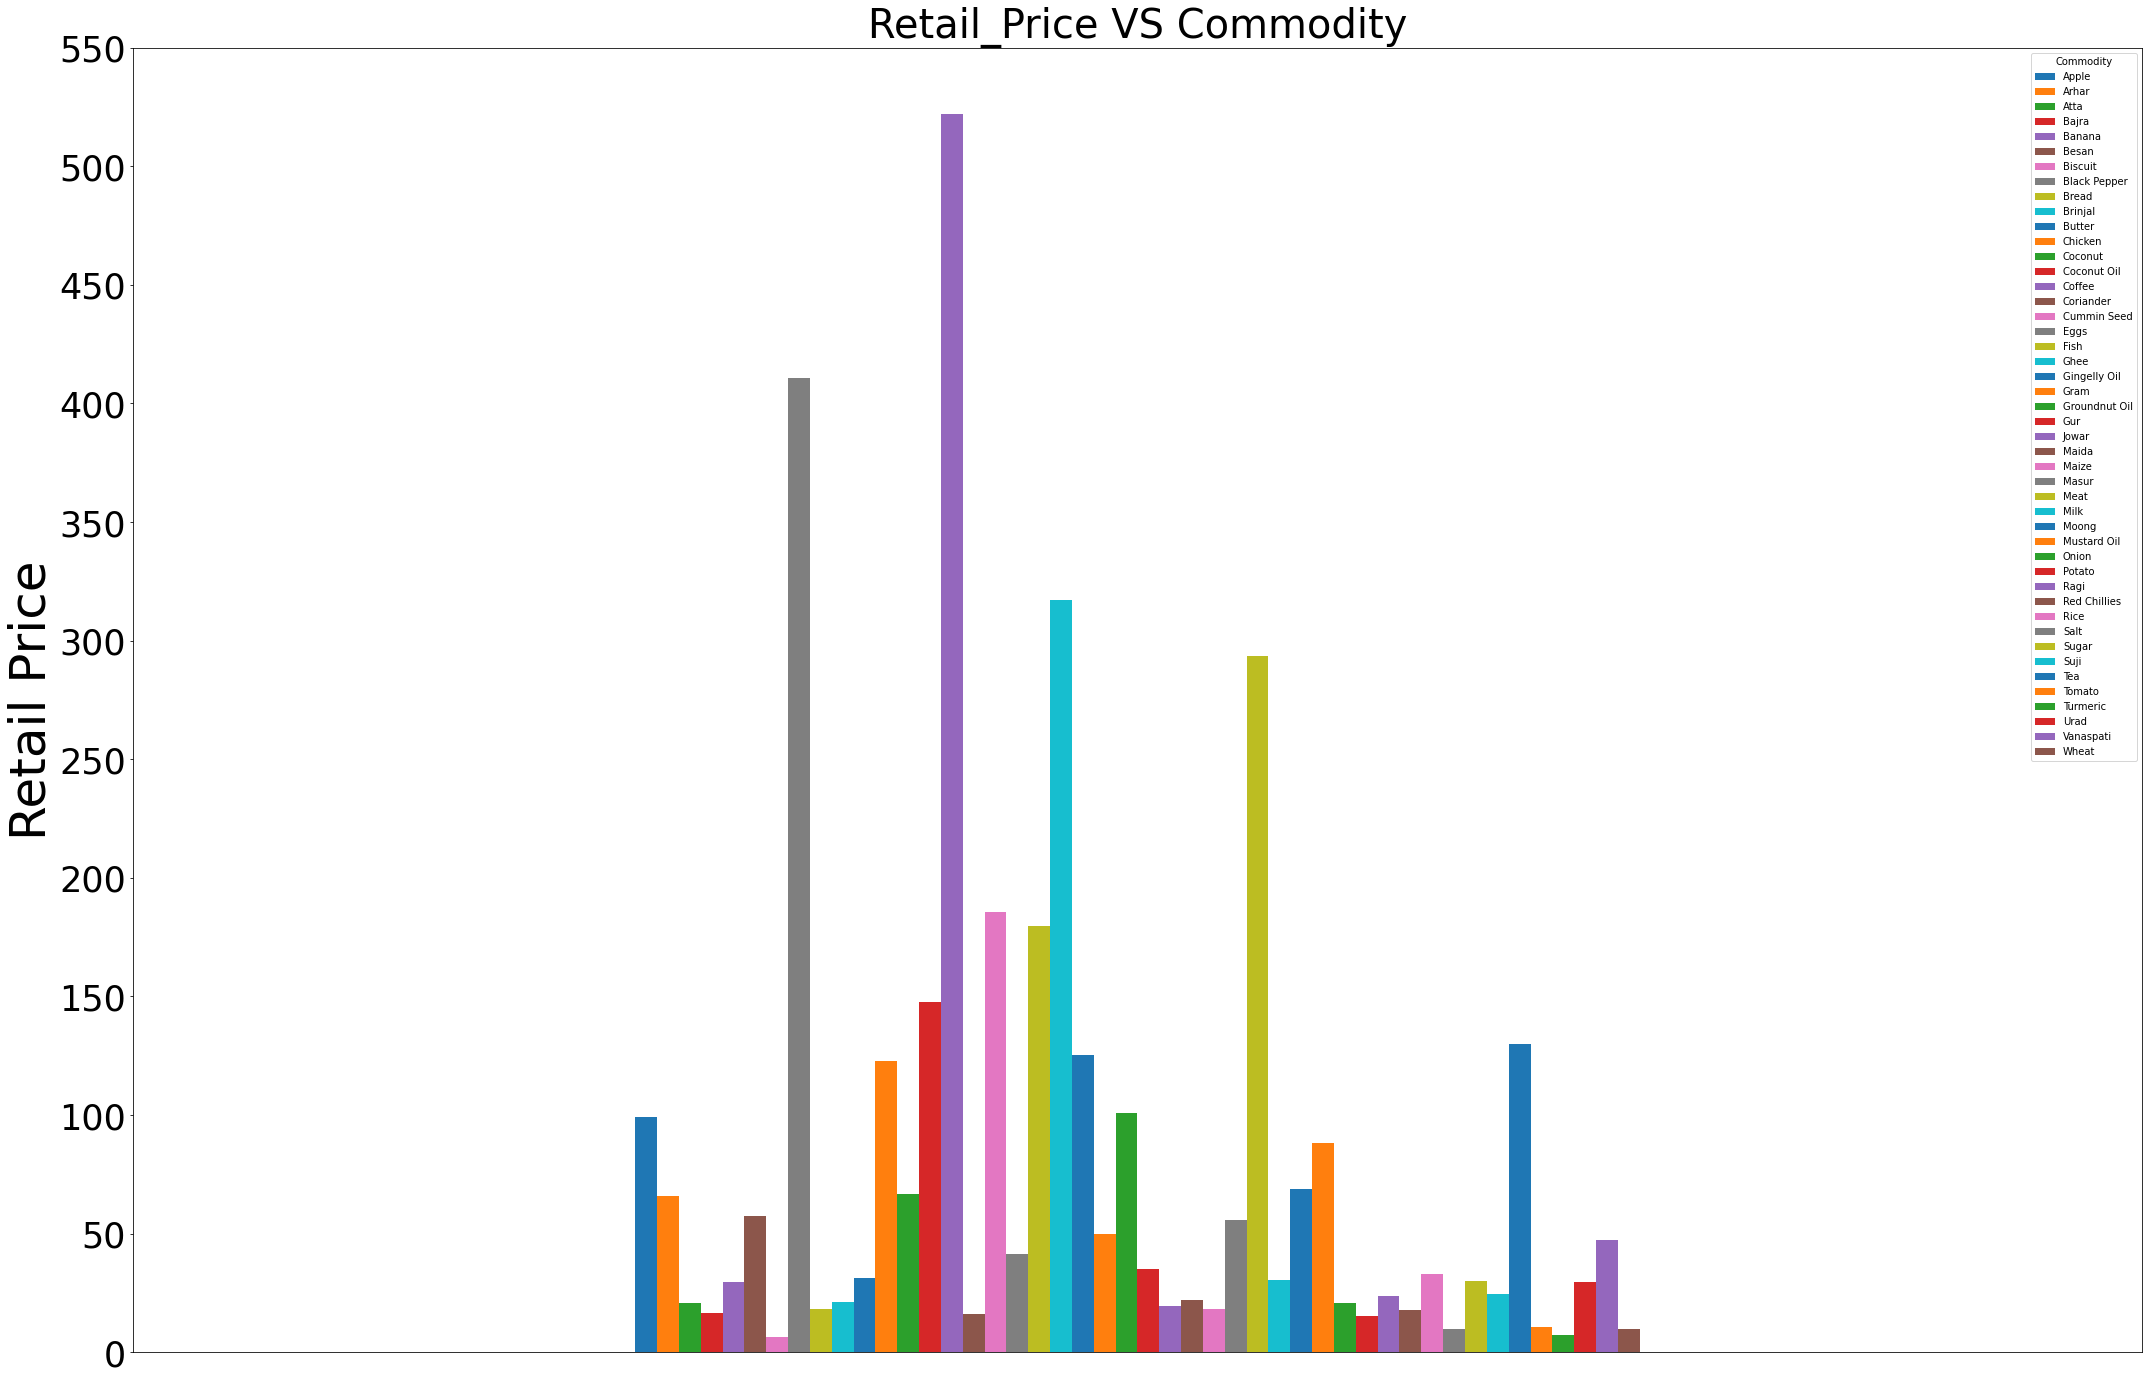

In [17]:
# graph title={'center':'Retail price  according to commudity'}>
s = df_pitot.xs(a, axis=1)

p1 = s.plot(kind='bar',title='Retail price  according to commudity',fontsize=35,  yticks=bin_values,figsize=[36,24])
plt.title("Retail_Price VS Commodity",
          fontsize = 40)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.ylabel("Retail Price",fontsize=50)

In [18]:
p1

<AxesSubplot:title={'center':'Retail_Price VS Commodity'}, ylabel='Retail Price'>

Text(0, 0.5, 'Retail Price')

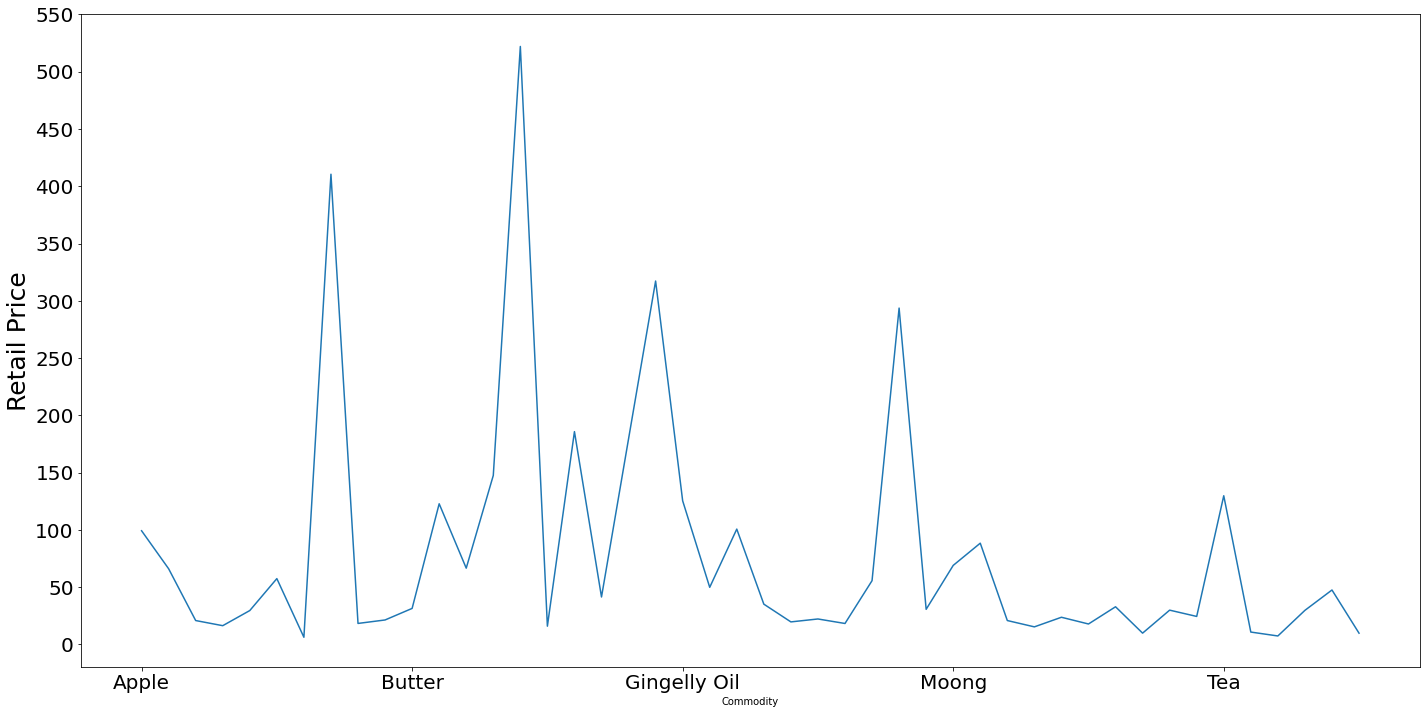

In [19]:
s1 = df_pitot.xs('Retail Price')
p = s1.plot(yticks=bin_values,figsize=[24,12],fontsize=20)
plt.ylabel("Retail Price",fontsize=25)

Text(0, 0.5, 'Retail Price')

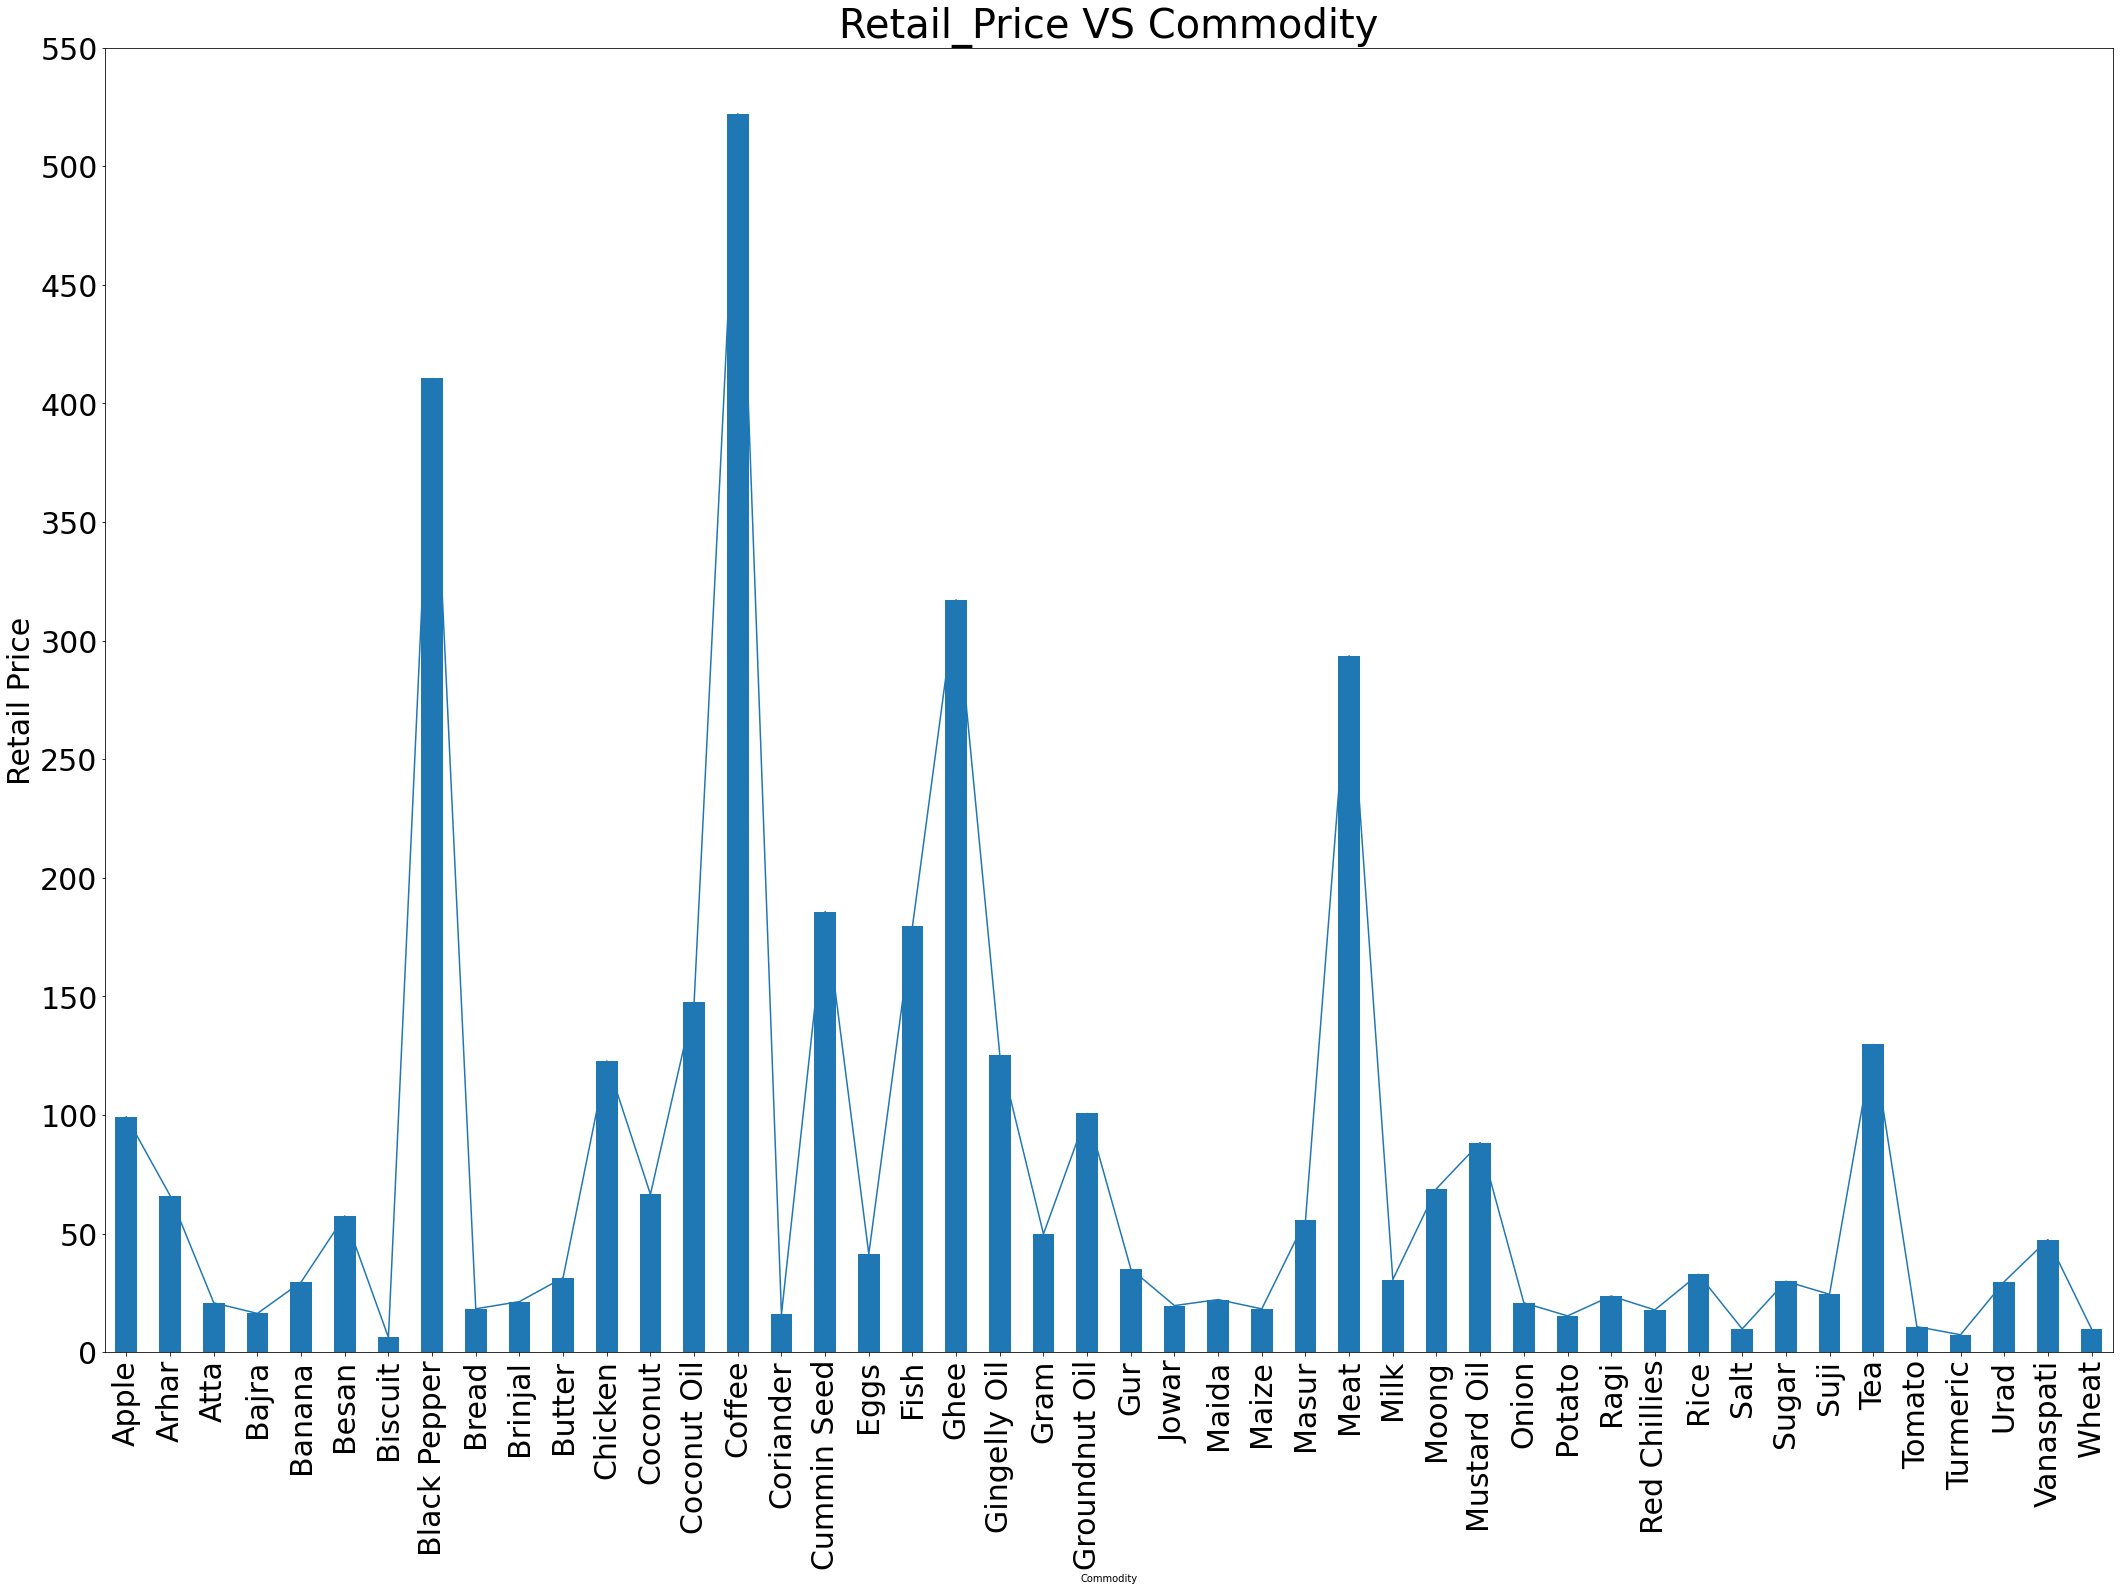

In [20]:
#graph every commodity with lines before missing value handling
s1 = df_pitot.xs('Retail Price')
p = s1.plot(yticks=bin_values,figsize=[24,12],fontsize=20)
p3 = s1.plot(kind='bar',title='Retail price  according to commudity',  yticks=bin_values,figsize=[36,24],fontsize=30)
plt.title("Retail_Price VS Commodity",
          fontsize = 40)
plt.ylabel("Retail Price",fontsize=30)

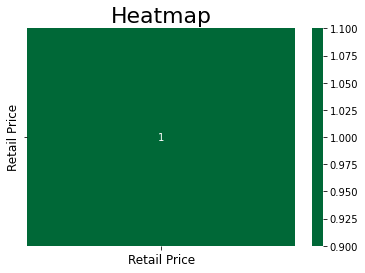

In [21]:
df=df.drop('delayed',axis=1)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Heatmap', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   State         1048575 non-null  object 
 1   Centre        1048575 non-null  object 
 2   Commodity     1039636 non-null  object 
 3   Variety       859804 non-null   object 
 4   Unit          1048575 non-null  object 
 5   Date          1048575 non-null  object 
 6   Retail Price  524215 non-null   float64
dtypes: float64(1), object(6)
memory usage: 56.0+ MB


In [23]:
df.describe()

,Retail Price
count,524215.000000
mean,83.857629
std,155.386310
min,0.500000
25%,18.000000
50%,36.000000
75%,85.000000
max,20045.000000


# NOW, WORK ON MISSING VALUE HANDLING

### Object columns missing value handling

In [24]:
#like for get the string value/columns
cat_vars=df.select_dtypes(include='object')
cat_vars.head(10)

,State,Centre,Commodity,Variety,Unit,Date
0,Andhra Pradesh,Chittoor,Moong,Split,Kg.,Jan-2001
1,Andhra Pradesh,Guntur,Moong,Split,Kg.,Jan-2001
2,Andhra Pradesh,Kurnool,Moong,Split,Kg.,Jan-2001
3,Andhra Pradesh,Vishakhapatnam,Moong,Split,Kg.,Jan-2001
4,Arunachal Pradesh,Itanagar,Moong,Split,Kg.,Jan-2001
5,Assam,Dibrugarh,Moong,Split,Kg.,Jan-2001
6,Assam,Dispur,Moong,Split,Kg.,Jan-2001
7,Assam,Guwahati,Moong,Split,Kg.,Jan-2001
8,Assam,Silchar,Moong,Split,Kg.,Jan-2001
9,Bihar,Gaya,Moong,Split,Kg.,Jan-2001


In [25]:
#we will get the percantage of missing value for every columns
miss_val_per = cat_vars.isnull().mean()*100
miss_val_per

State         0.000000
Centre        0.000000
Commodity     0.852490
Variety      18.002623
Unit          0.000000
Date          0.000000
dtype: float64

In [26]:
#we will get the name of columns where missing value percentage >0 
isnull_per = cat_vars.isnull().mean()*100
miss_vars=isnull_per[isnull_per>0].keys()
miss_vars

Index(['Commodity', 'Variety'], dtype='object')

In [27]:
#for count the items whoes is in it
cat_vars['Commodity'].value_counts()

Rice             61965
Fish             51273
Gram             41796
Salt             41310
Milk             41310
Coconut          41067
Tea              40581
Coffee           37422
Moong            20655
Biscuit          20655
Onion            20655
Potato           20655
Sugar            20655
Mustard Oil      20655
Gur              20655
Eggs             20412
Butter           20412
Ghee             20412
Black Pepper     20412
Bread            20412
Brinjal          20412
Chicken          20412
Meat             20412
Masur            20412
Arhar            20412
Suji             20412
Besan            20412
Banana           20412
Red Chillies     20412
Atta             20412
Maida            20412
Apple            20412
Coriander        20169
Cummin Seed      20169
Groundnut Oil    20169
Coconut Oil      19926
Gingelly Oil     19440
Maize            19197
Jowar            17010
Bajra            16767
Ragi             14580
Wheat             7708
Urad              4080
Vanaspati  

In [28]:
#for count the items whoes is in it
cat_vars['Variety'].value_counts()

FAQ                      159114
Split                     87234
Powdered Agmark           45147
Whole                     41553
Local                     41553
Desi                      24415
Packet(iodized)           20898
Cow/Buffalo               20898
Fine                      20898
Fresh                     20655
Delicious medium size     20655
Glucose                   20655
Loose(common)             20655
Dry                       20655
Mutton                    20655
Superfine                 20655
Poultry                   20655
Amul/Any Other            20655
Common/Coarse             20655
Rohu 1Kg Size             20412
Brooke Bond Red Label     20412
Dairy                     20412
Common                    20412
Ctc(loose)                20169
Instant                   19683
Powdered                  17739
White                     17253
Pomphret                  17010
Cat Fish                  14094
Kalyan HYV                 3948
Name: Variety, dtype: int64

In [29]:
#we will the get the mode of columns  
cat_vars['Commodity'].mode()

0    Rice
Name: Commodity, dtype: object

In [30]:
cat_vars['Variety'].mode()

0    FAQ
Name: Variety, dtype: object

In [31]:
##for fill the missing value accordding to mode() value      //for more columns
for var in miss_vars:
    dff = cat_vars[var].fillna(cat_vars[var].mode()[0],inplace = True)
    print(var,"=",cat_vars[var].mode()[0])

Commodity = Rice
Variety = FAQ


In [32]:
#do for check the null values is in it or not
cat_vars.isnull().sum()

State        0
Centre       0
Commodity    0
Variety      0
Unit         0
Date         0
dtype: int64

###  Int/Float columns missing value handling

In [33]:
#like for get the float/int value/columns
cat_vars_num=df.select_dtypes(include=['int64','float64'])
cat_vars_num.head(10)

,Retail Price
0,24.0
1,26.0
2,25.5
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [34]:
#get parcentage of missing value in int and float columns
miss_val_per1 = cat_vars_num.isnull().mean()*100
miss_val_per1

Retail Price    50.006914
dtype: float64

In [35]:
#for get variable where values is missing according to candition
missing_num_var2=miss_val_per1[miss_val_per1>0].keys()
missing_num_var2

Index(['Retail Price'], dtype='object')

In [36]:
#for count the items whoes is in it
cat_vars_num['Retail Price'].value_counts()

20.00       18046
30.00       17586
10.00       16756
40.00       14217
12.00       13749
15.00       12496
18.00       11921
25.00       10732
60.00       10626
16.00       10471
50.00        9760
8.00         9560
14.00        9275
24.00        9236
28.00        8956
120.00       8839
80.00        8798
22.00        7995
70.00        7829
100.00       7694
32.00        7495
35.00        7320
90.00        6798
7.00         6689
26.00        6554
160.00       6313
45.00        6247
36.00        6108
13.00        6086
5.00         5891
6.00         5720
200.00       5646
140.00       5597
180.00       5512
38.00        5393
17.00        5328
150.00       4986
65.00        4778
110.00       4714
9.00         4595
34.00        4474
42.00        4402
11.00        4386
48.00        4295
75.00        4267
130.00       3999
55.00        3898
44.00        3480
85.00        3444
19.00        3380
4.00         3287
27.00        3261
23.00        2957
46.00        2945
220.00       2895
52.00     

In [37]:
for i in a:
    filtered_values1 = df[(df.Commodity==i)]
    dff1 = filtered_values1['Retail Price'].fillna(filtered_values1['Retail Price'].median(),inplace = True)
    df.update(filtered_values1)

C:\Users\91882\AppData\Local\Temp\ipykernel_14816\1960770484.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff1 = filtered_values1['Retail Price'].fillna(filtered_values1['Retail Price'].median(),inplace = True)
C:\Users\91882\AppData\Local\Temp\ipykernel_14816\1960770484.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff1 = filtered_values1['Retail Price'].fillna(filtered_values1['Retail Price'].median(),inplace = True)
C:\Users\91882\AppData\Local\Temp\ipykernel_14816\1960770484.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the document

C:\Users\91882\AppData\Local\Temp\ipykernel_14816\1960770484.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff1 = filtered_values1['Retail Price'].fillna(filtered_values1['Retail Price'].median(),inplace = True)
C:\Users\91882\AppData\Local\Temp\ipykernel_14816\1960770484.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff1 = filtered_values1['Retail Price'].fillna(filtered_values1['Retail Price'].median(),inplace = True)
C:\Users\91882\AppData\Local\Temp\ipykernel_14816\1960770484.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the document

C:\Users\91882\AppData\Local\Temp\ipykernel_14816\1960770484.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff1 = filtered_values1['Retail Price'].fillna(filtered_values1['Retail Price'].median(),inplace = True)
C:\Users\91882\AppData\Local\Temp\ipykernel_14816\1960770484.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff1 = filtered_values1['Retail Price'].fillna(filtered_values1['Retail Price'].median(),inplace = True)
C:\Users\91882\AppData\Local\Temp\ipykernel_14816\1960770484.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the document

In [38]:
#we got the final data after missing value handling
df.head(200)

,State,Centre,Commodity,Variety,Unit,Date,Retail Price
0,Andhra Pradesh,Chittoor,Moong,Split,Kg.,Jan-2001,24.00
1,Andhra Pradesh,Guntur,Moong,Split,Kg.,Jan-2001,26.00
2,Andhra Pradesh,Kurnool,Moong,Split,Kg.,Jan-2001,25.50
3,Andhra Pradesh,Vishakhapatnam,Moong,Split,Kg.,Jan-2001,70.00
4,Arunachal Pradesh,Itanagar,Moong,Split,Kg.,Jan-2001,70.00
5,Assam,Dibrugarh,Moong,Split,Kg.,Jan-2001,70.00
6,Assam,Dispur,Moong,Split,Kg.,Jan-2001,70.00
7,Assam,Guwahati,Moong,Split,Kg.,Jan-2001,70.00
8,Assam,Silchar,Moong,Split,Kg.,Jan-2001,70.00
9,Bihar,Gaya,Moong,Split,Kg.,Jan-2001,70.00


In [39]:
#do for check the null values is in it or not
df.isnull().sum()

State           0
Centre          0
Commodity       0
Variety         0
Unit            0
Date            0
Retail Price    0
dtype: int64

In [ ]:
# graph before missing value handling

Text(0, 0.5, 'Retail Price')

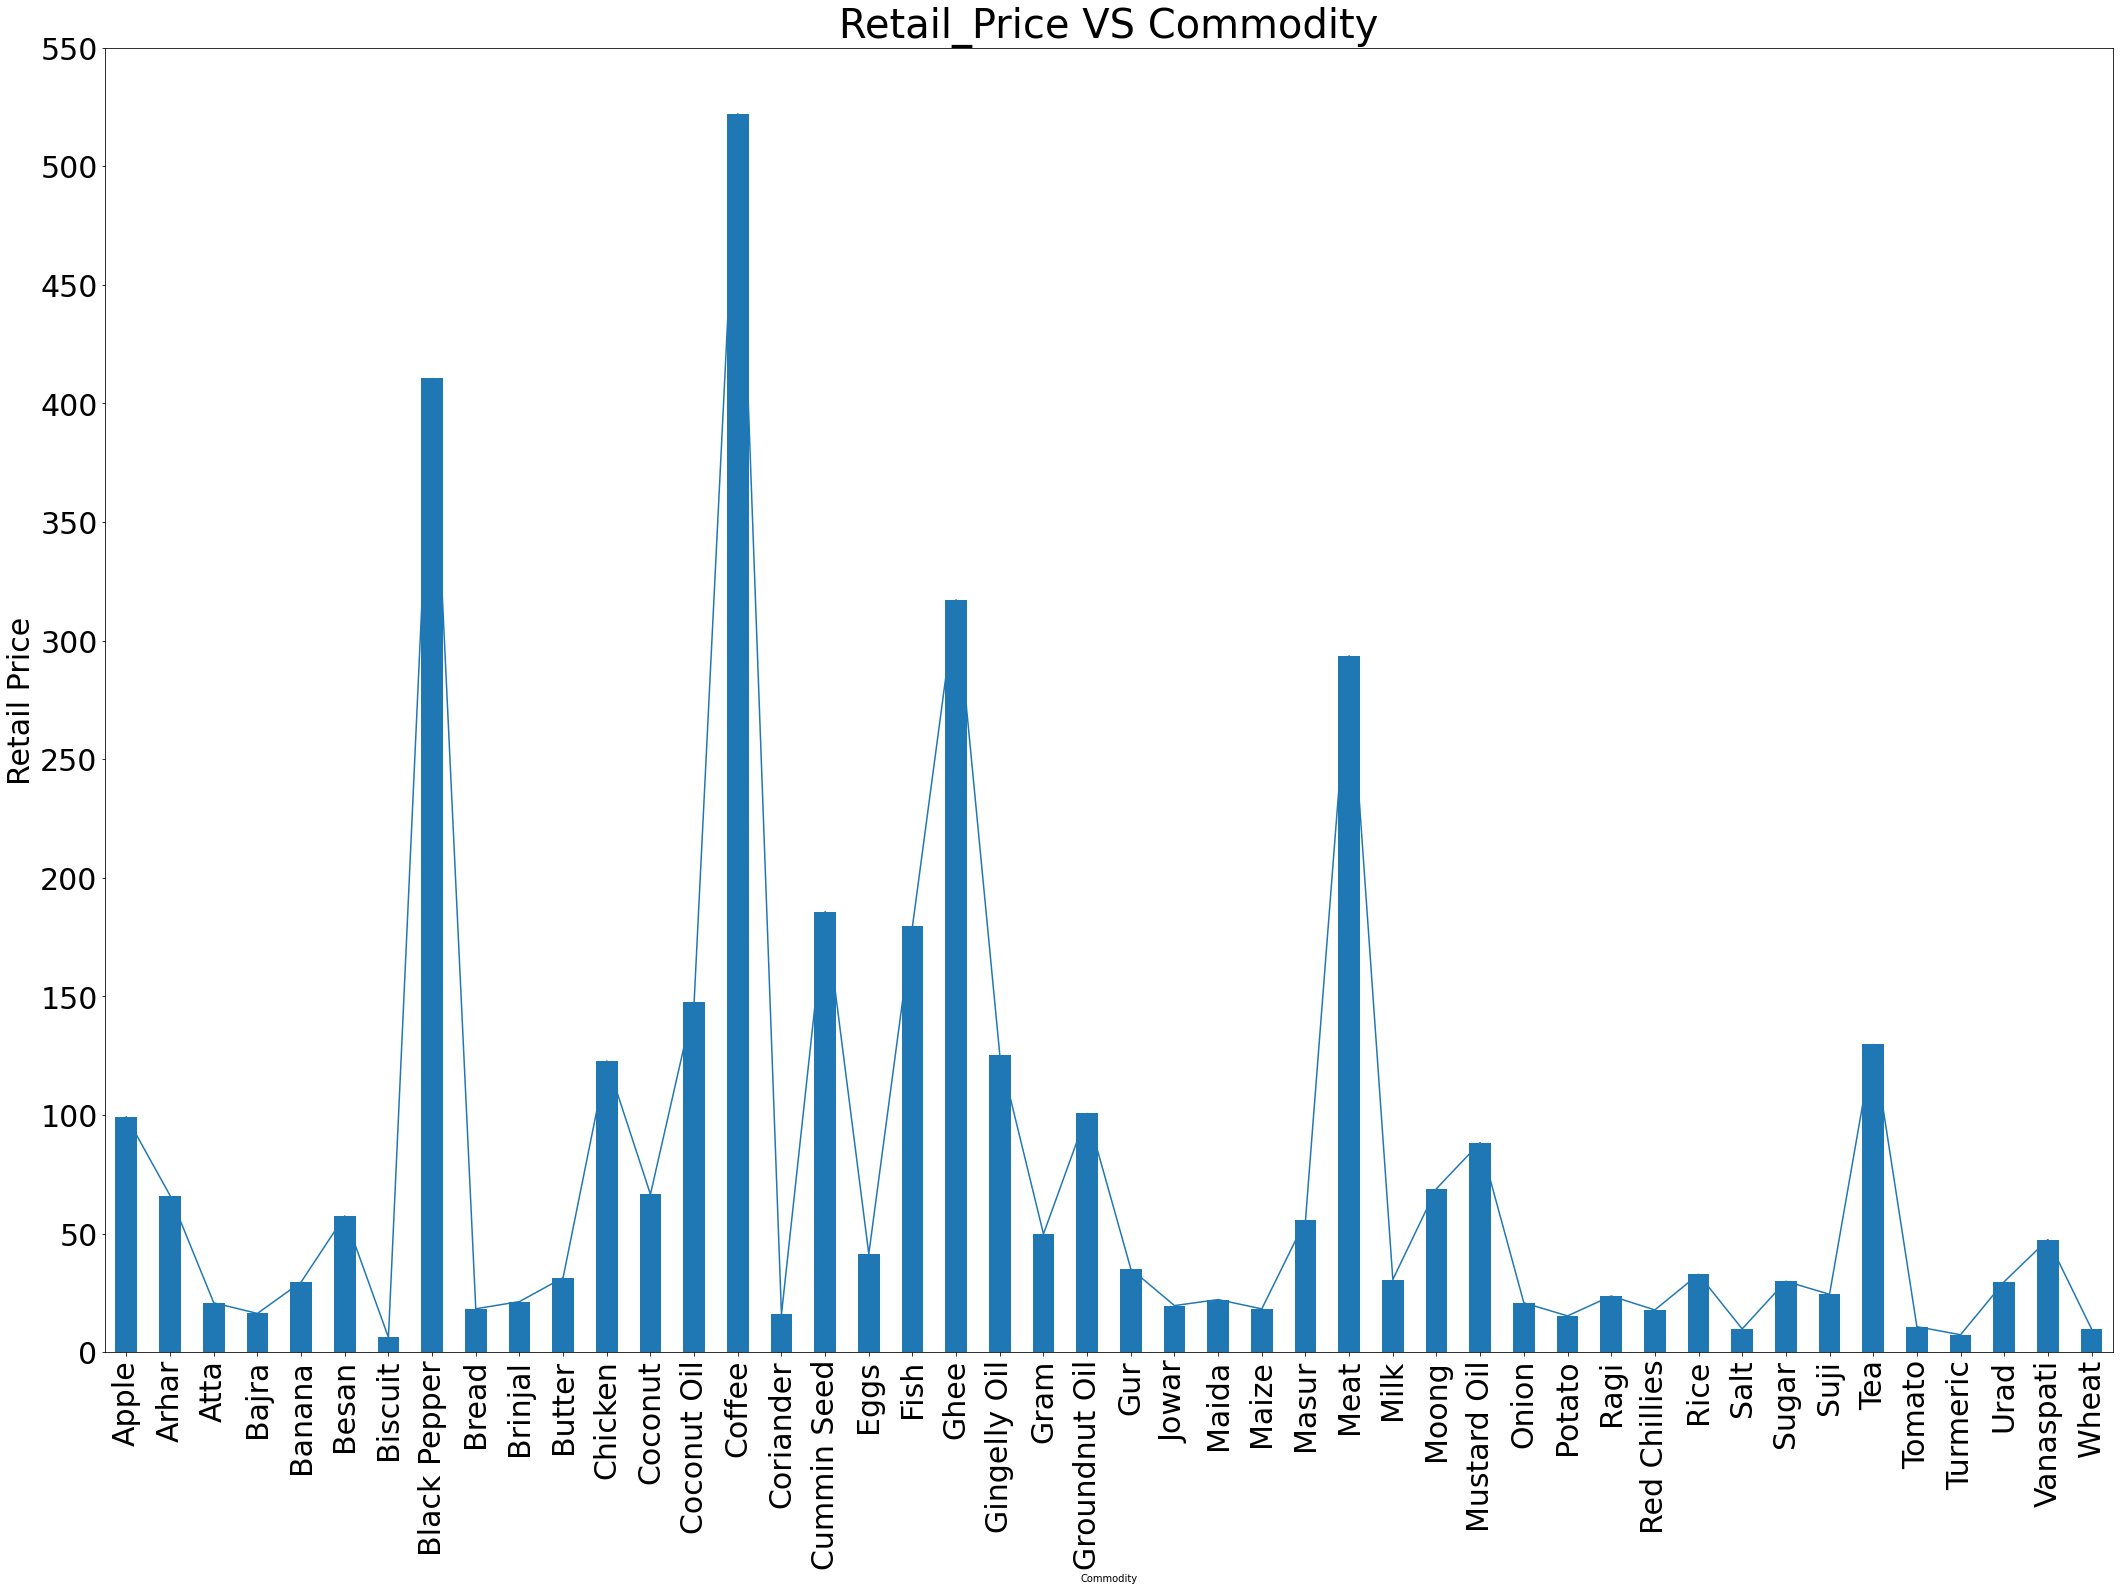

In [175]:
p = s1.plot(yticks=bin_values,figsize=[24,12],fontsize=20)
p3 = s1.plot(kind='bar',title='Retail price  according to commodity',  yticks=bin_values,figsize=[36,24],fontsize=30)
plt.title("Retail_Price VS Commodity",
          fontsize = 40)
plt.ylabel("Retail Price",fontsize=30)

In [40]:
dfw = df.fillna(np.nan)
dfw['delayed'] = df['Retail Price'].apply(lambda x: x > 0)
dfw['delayed'].head(10)

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
Name: delayed, dtype: bool

In [41]:
delayed_flights_new= dfw[dfw['delayed'] == True]
delayed_flights_new['Commodity'].value_counts() #count the number of rows for each carrier

Rice             70904
Fish             51273
Gram             41796
Salt             41310
Milk             41310
Coconut          41067
Tea              40581
Coffee           37422
Moong            20655
Biscuit          20655
Mustard Oil      20655
Onion            20655
Potato           20655
Sugar            20655
Gur              20655
Eggs             20412
Butter           20412
Ghee             20412
Black Pepper     20412
Bread            20412
Brinjal          20412
Chicken          20412
Meat             20412
Masur            20412
Arhar            20412
Suji             20412
Besan            20412
Banana           20412
Red Chillies     20412
Atta             20412
Maida            20412
Apple            20412
Coriander        20169
Cummin Seed      20169
Groundnut Oil    20169
Coconut Oil      19926
Gingelly Oil     19440
Maize            19197
Jowar            17010
Bajra            16767
Ragi             14580
Wheat             7708
Urad              4080
Vanaspati  

In [42]:
delayed_by_carrier_new=dfw.groupby(['Commodity','delayed']).size().unstack()
delayed_by_carrier_new[:5]

delayed,True
Commodity,
Apple,20412
Arhar,20412
Atta,20412
Bajra,16767
Banana,20412


In [43]:
df_pitot1 =df.pivot_table(columns='Commodity', values='Retail Price')
df_pitot1

Commodity,Apple,Arhar,Atta,Bajra,Banana,Besan,Biscuit,Black Pepper,Bread,Brinjal,Butter,Chicken,Coconut,Coconut Oil,Coffee,Coriander,Cummin Seed,Eggs,Fish,Ghee,Gingelly Oil,Gram,Groundnut Oil,Gur,Jowar,Maida,Maize,Masur,Meat,Milk,Moong,Mustard Oil,Onion,Potato,Ragi,Red Chillies,Rice,Salt,Sugar,Suji,Tea,Tomato,Turmeric,Urad,Vanaspati,Wheat
Retail Price,97.028807,66.883913,20.483965,15.627251,27.566273,53.947881,5.658917,351.89024,17.22627,20.763742,28.808162,121.553326,48.005541,133.541037,438.402453,15.518464,183.018667,40.805467,153.458944,304.746938,117.333231,47.231577,95.290803,35.107133,18.716469,22.129847,17.60309,56.769621,274.727088,29.653816,69.425965,88.689351,18.804193,14.363118,22.561838,17.041054,33.327973,9.434481,30.806811,23.813587,118.847065,10.252778,7.171334,29.915074,45.858761,9.597425


Text(0, 0.5, 'Retail Price')

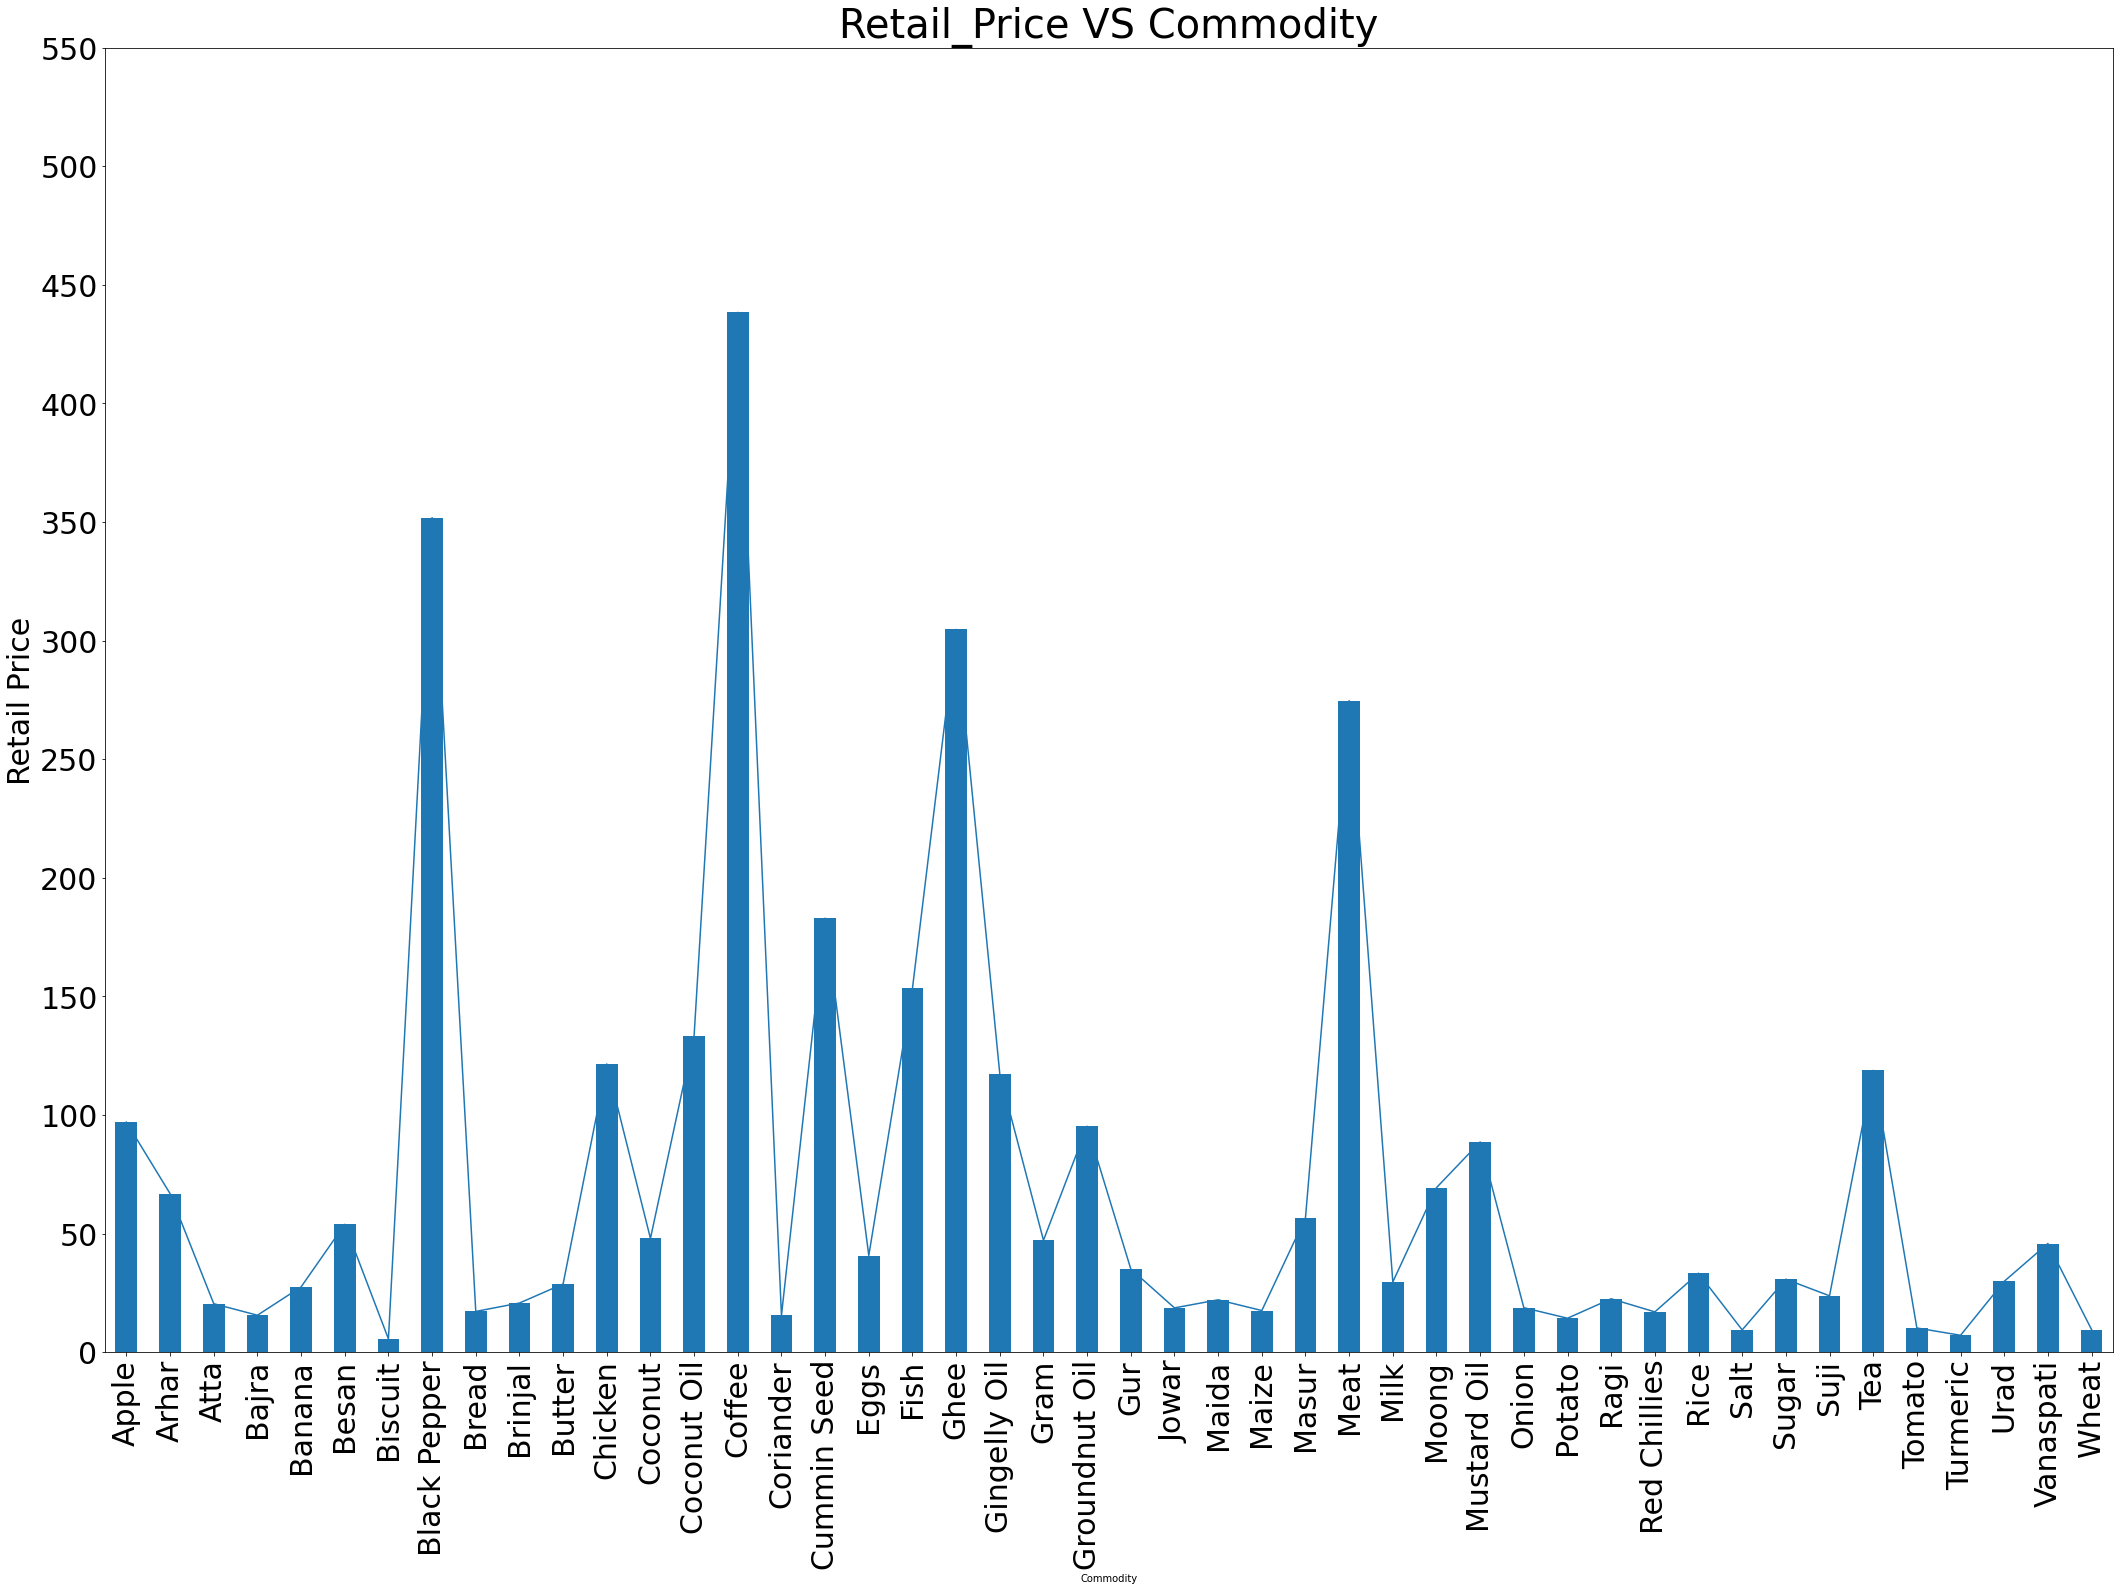

In [44]:
df_pitot1 =df.pivot_table(columns='Commodity', values='Retail Price')
#graph every commodity with lines before missing value handling
s2 = df_pitot1.xs('Retail Price')
p4 = s2.plot(yticks=bin_values,figsize=[24,12],fontsize=20)
p5 = s2.plot(kind='bar',title='Retail price  according to commudity',  yticks=bin_values,figsize=[36,24],fontsize=30)
plt.title("Retail_Price VS Commodity",
          fontsize = 40)
plt.ylabel("Retail Price",fontsize=30)

<AxesSubplot:>

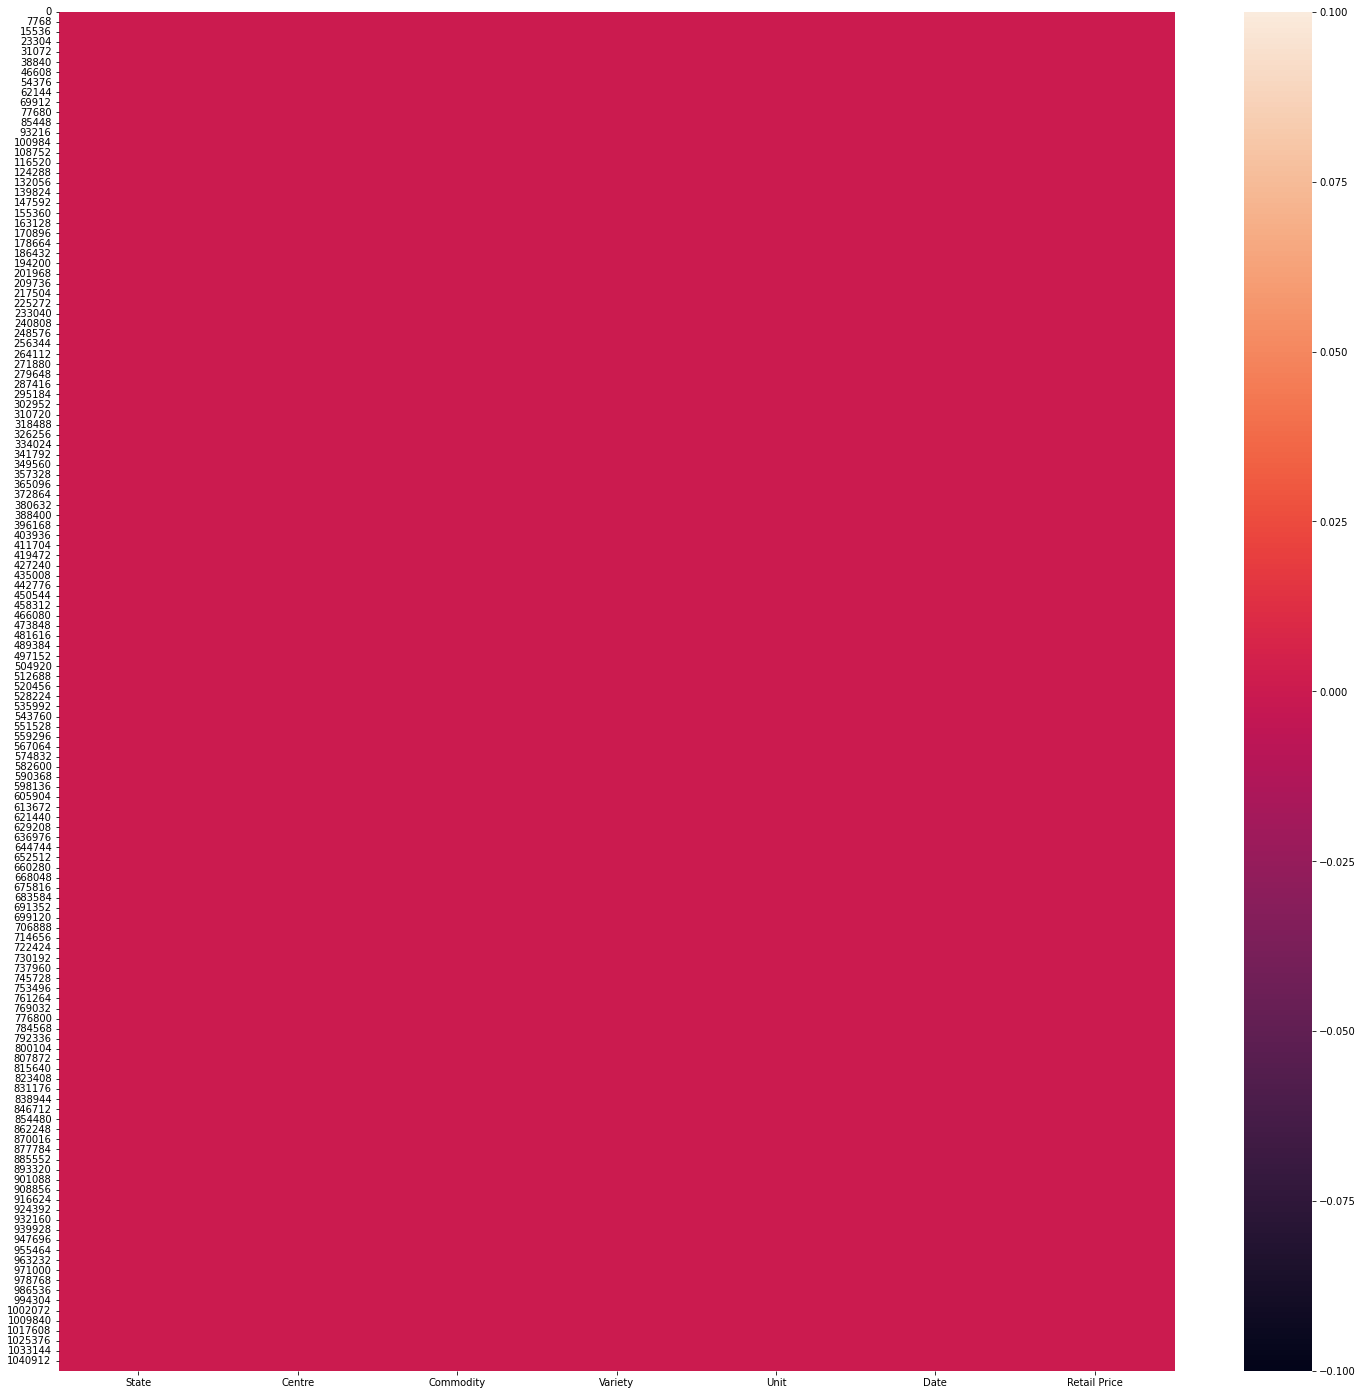

In [45]:
plt.figure(figsize=(25,25))
sns.heatmap(df.isnull())

Text(0, 0.5, 'Retail Price')

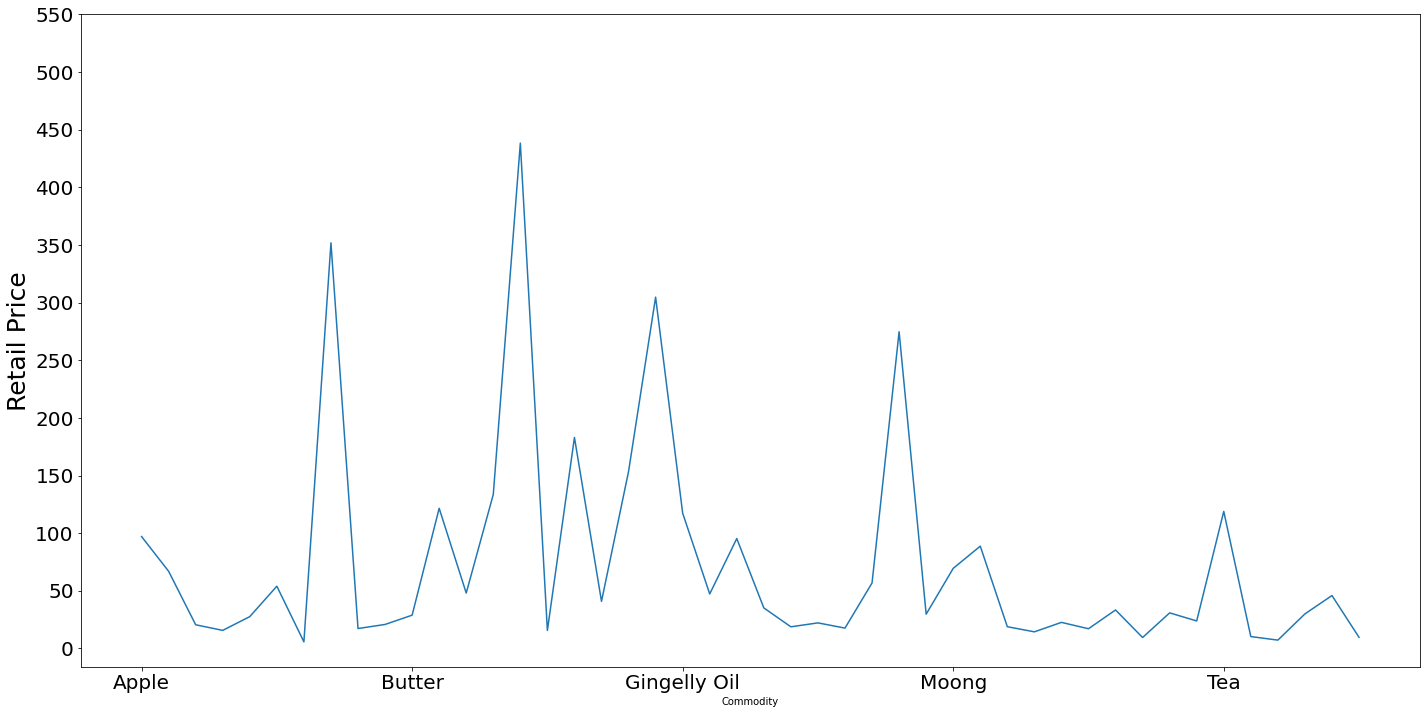

In [46]:
s2 = df_pitot1.xs('Retail Price')
p1 = s2.plot(yticks=bin_values,figsize=[24,12],fontsize=20)
plt.ylabel("Retail Price",fontsize=25)

In [47]:
df_copy = pd.read_csv(r"C:\Users\91882\Downloads\archive (1)\Monthly_Food_Retail_Prices.csv")

In [48]:
#before handling 
df_copy['Retail Price'].mean()

83.85762898810603

In [49]:
# after handling
df['Retail Price'].mean()

82.56694845862243

In [50]:
#before handling 
df_copy['Retail Price'].median()

36.0

In [51]:
# after handling
df['Retail Price'].median()

35.0